# Convert data from the [PLAsTiCC Classification Challenge](https://zenodo.org/record/2539456#.XX-1apNKhTY) 

In [0]:
import pandas as pd
import numpy as np
from astropy import units
from astropy.coordinates import SkyCoord, Distance
from astropy.cosmology import WMAP9
from astropy.time import Time
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('plasticc_test_metadata.csv')

df

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,true_target,true_submodel,true_z,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,13,34.4531,-5.2295,1,0.305,0.319,0.054,41.112,0.019,0,42,1,0.302,40.977,0.000,120.2,0.0,0.0,60499.461,124,0.0,0.0,0.0,0.0,0.0,0.0
1,14,33.3984,-4.3311,1,-9.000,0.632,0.018,42.877,0.018,0,42,2,0.610,42.785,-0.027,584.6,0.0,0.0,59792.121,120,0.0,0.0,0.0,0.0,0.0,0.0
2,17,348.5294,-61.7554,1,-9.000,0.830,0.060,43.600,0.016,0,42,2,0.826,43.587,0.001,-148.0,0.0,0.0,60543.566,85,0.0,0.0,0.0,0.0,0.0,0.0
3,23,34.8047,-5.8292,1,-9.000,0.653,0.148,42.964,0.023,0,90,1,0.624,42.842,0.010,-3.5,0.0,0.0,60137.480,97,0.0,0.0,0.0,0.0,0.0,0.0
4,34,351.3214,-64.1987,1,0.456,0.462,0.012,42.054,0.023,0,90,1,0.454,42.015,-0.047,261.6,0.0,0.0,60245.078,68,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492885,130787966,67.5000,-23.8063,0,-9.000,0.449,0.995,41.984,0.036,0,42,1,0.398,41.668,-0.016,-369.7,0.0,0.0,60176.078,35877,0.0,0.0,0.0,0.0,0.0,0.0
3492886,130787971,98.7891,-32.9749,0,-9.000,0.673,0.061,43.042,0.083,0,90,1,0.712,43.193,0.017,103.4,0.0,0.0,60659.273,47200,0.0,0.0,0.0,0.0,0.0,0.0
3492887,130787974,133.9453,-21.5423,0,-9.000,0.121,0.009,38.760,0.136,0,42,2,0.142,39.126,-0.015,-0.6,0.0,0.0,60261.289,21691,0.0,0.0,0.0,0.0,0.0,0.0
3492888,130788053,199.1602,-0.8953,0,-9.000,0.429,0.262,41.863,0.028,0,42,2,0.408,41.730,-0.022,-402.7,0.0,0.0,60143.660,23710,0.0,0.0,0.0,0.0,0.0,0.0


### Convert Coordinates

In [10]:
c = SkyCoord(df['ra']*units.degree, df['decl']*units.degree, distance=WMAP9.comoving_distance(df['true_z'])).galactic.cartesian
print(len(c))

3492890


In [11]:
x = c.x.to(units.Mpc).value
y = c.y.to(units.Mpc).value
z = c.z.to(units.Mpc).value
print(max(x))
print(max(y))
print(max(z))

6698.987286888117
4630.05387012038
6090.959259422118


In [12]:
d = np.sqrt(x**2. + y**2. + z**2.)
print(max(d))

6912.844008591159


### Get Dates

In [26]:
t = Time(df['true_peakmjd'], format='mjd').decimalyear
print(len(t))

3492890


2001.6105205479453 2034.5166191780822
3492890


(2020, 2030)

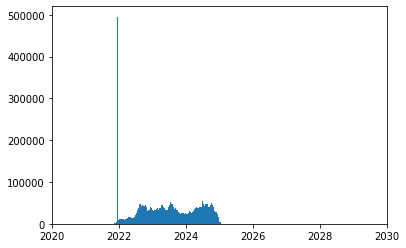

In [33]:
print(min(t), max(t))
print(len(t))
f, ax = plt.subplots()
_ = ax.hist(t, bins=1000)
ax.set_xlim(2020, 2030)

### Convert types from true_target integer to SNe Type

In [34]:
# Rename Ibc and SLSN-I as I
# Rename Ia-91bg and Iax as Ia
tpe = []
tpeIndex = 0
for tp in df['true_target']:
  if tp == 90:   #Ia
      tpe.append('Ia')
  elif tp == 42: #II
      tpe.append('II')
  elif tp == 62: #Ibc
      tpe.append('I')
  elif tp == 67: #Ia-91bg
      tpe.append('Ia')
  elif tp == 52: #Iax
      tpe.append('Ia')
  elif tp == 64: #KN
      tpe.append('KN')
  elif tp == 95: #SLSN-I
      tpe.append('I')
  elif tp == 15: #TDE
      tpe.append('TDE')
  elif tp == 88: #AGN
      tpe.append('AGN')
  elif tp == 92: #RRL
      tpe.append('RRL')
  elif tp == 65: #M-dwarf
      tpe.append('M-dwarf')
  elif tp == 16: #EB
      tpe.append('EB')
  elif tp == 53: #Mira
      tpe.append('Mira')
  elif tp == 6: #muLens-Single
      tpe.append('muLens-Single')
  else:
      tpe.append('n/a')
  tpeIndex = tpeIndex + 1

print(len(tpe))
print(tpeIndex)


3492890
3492890


### Go over data again and pull only Types Ia,I,II

In [38]:
x2 = []
y2 = []
z2 = []
t2 = []
tpe2 = []

i = 0
for tp in tpe:
  if tp == "Ia" or tp == "I" or tp =="II":
    x2.append(x[i])
    y2.append(y[i])
    z2.append(z[i])
    t2.append(t[i])
    tpe2.append(tpe[i])
  i = i + 1

print(len(x2))
print(len(y2))
print(len(z2))
print(len(t2))
print(len(tpe2))
print(i)

2974714
2974714
2974714
2974714
2974714
3492890


In [41]:
print(len(tpe), len(x), len(y), len(z), len(t))
print(len(tpe2), len(x2), len(y2), len(z2), len(t2))
print(tpe)
print(tpe2)

data = {
        'type':np.array(tpe2),
        'x':np.array(x2),
        'y':np.array(y2),
        'z':np.array(z2),
        't':np.array(t2)}
pd.DataFrame(data).to_csv('LSSTConverted.csv', index=False)

3492890 3492890 3492890 3492890 3492890
2974714 2974714 2974714 2974714 2974714


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2021.8356273972602 2025.2021616438356
2974714


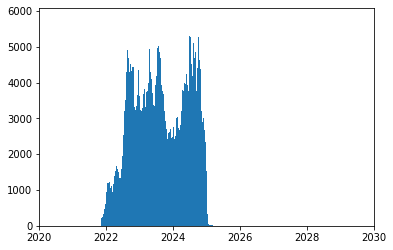

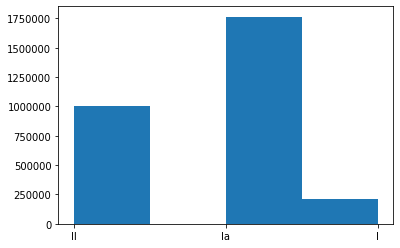

In [40]:
print(min(t2), max(t2))
print(len(t2))
f, ax = plt.subplots()
_ = ax.hist(t2, bins=1000)
ax.set_xlim(2020, 2030)

f2, ax2 = plt.subplots()
_2 = ax2.hist(tpe2, bins=4)